PROBLEM STATEMENT:
I will analyze the impact of Consumer Price Index (CPI) releases on various financial market sectors by comparing government-released CPI data with sector index price data over the past two years. My goal is to determine which sector is most influenced by changes in CPI. Inflation is a critical economic indicator that influences financial markets. The Consumer Price Index (CPI) is one of the most closely watched indicators of inflation. When the US government releases new CPI data, it can cause significant reactions in various sectors of the stock market. This project aims to analyze how sector indices react to the release of CPI inflation data over a two-week period following the announcement. By examining historical CPI announcements and corresponding movements in sector indices, we can gain insights into the relationship between inflation data and market performance.



In [1]:
#Import libriaries necessary (Pandas /Numpy) 
import pandas as pd 
import numpy as np 

NumPy and pandas are essential libraries in the Python programming ecosystem, particularly for data science and numerical computing. NumPy (Numerical Python) provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently. It forms the foundation for many other scientific computing libraries. Pandas, on the other hand, is built on top of NumPy and offers data structures like Series (one-dimensional) and DataFrame (two-dimensional) that are designed to handle and manipulate structured data easily. It is widely used for data cleaning, preparation, and analysis due to its powerful and flexible data manipulation capabilities.

In [2]:
economics = pd.read_csv('PYTHON BLOOMBERG_1.csv') # Dataframe of economic data 
price_history = pd.read_csv('PYTHON BLOOMBERG_2.csv') # Data file that contains index price data for the past two years

In the 'economics' dataframe, the columns are defined as 'date', 'event name', 'period', 'survey median', 'actual', 'prior', 'revision'. Descriptions of these column are as follows. 'date' = Represents the specific date and time that the economic metric was reported by the federal goverment. 'event_name' = The name or type of event that the data corresponds to. For example, "CPI Release" or "Inflation Report.". 'period' = The time period that the data covers. This could be a month, quarter, or year, depending on the frequency of the data release. For example, "April 2023" for a monthly CPI report. 'survey_median' = The median value of the surveyed predictions or estimates made by economists or analysts before the actual data release. This represents the consensus expectation for the metric. 'prior' = The value of the metric from the previous period. This is used for comparison to assess how the metric has changed from one period to the next. 'revision' = Any adjustments made to the previously reported data. Revisions occur when initial estimates are updated based on more comprehensive data or corrected calculations.

In [3]:
Preview = economics.head(10) #Preview of the first 10 rows of the economics dataset   
Preview 

,date,event name,period,survey median,actual,prior,revision
0,4/19/2022 8:30,Housing Starts,Mar,1740.00000,1793.00,1769.00,1771.00
1,4/20/2022 7:00,MBA Mortgage Applications,15-Apr,NaN,-5.00,-1.30,NaN
2,4/20/2022 10:00,Existing Home Sales,Mar,5.77375,5.77,6.02,5.89
3,4/21/2022 8:30,Initial Jobless Claims,16-Apr,180.00000,184.00,185.00,215.00
4,4/21/2022 10:00,Leading Index,Mar,0.25000,0.30,0.30,0.30
5,4/22/2022 9:45,S&P Global US Manufacturing PMI,Apr P,58.00000,NaN,58.80,NaN
6,4/26/2022 8:30,Durable Goods Orders,Mar P,1.00000,0.80,-2.10,-1.70
7,4/26/2022 10:00,New Home Sales,Mar,767.50000,763.00,772.00,773.00
8,4/26/2022 10:00,Conf. Board Consumer Confidence,Apr,108.20000,107.30,107.20,107.60
9,4/27/2022 7:00,MBA Mortgage Applications,22-Apr,NaN,-8.30,-5.00,NaN


In the 'economics' dataframe, we can count the number of null values across the different columns. All of the null values are in the columns 'survey median', 'actual' or 'revision'. Depending on the data, the number of null values can differ dramatically. For example, as seen in the preview of the dataset above - there are no survey median values contributed to Bloomberg for the consensus estimate. A similar logic can be followed to explain the missing data in the 'actual' and 'revision' columns.   

In [4]:
economics.isnull().sum() # Counting the number values across the different columns for the entire dataset

date               0
event name         0
period             0
survey median    102
actual            24
prior              0
revision         307
dtype: int64

We can see that there are zero null values for 'date','event name', 'period', 'actual' columns in relation to the 'event name ' CPI MoM. These four will serve as the primary columns of data that will be used for price analysis later on. The revision column has 12 null values. These revisions happen on a regular basis, adjusting for the seasonal patterns of the prices for goods included in CPI calculation 

In [5]:
CPI_NULL = economics[economics['event name '] == 'CPI MoM'].isnull().sum()
print(CPI_NULL)

date              0
event name        0
period            0
survey median     0
actual            0
prior             0
revision         12
dtype: int64


The code below leverages .value_counts() to give insight to which of the government metrics are reported most often. The frequency at which a given governemtn metric is reported varies. Initial Jobless Claims for example is released on a weekly basis, while FOMC Rate Decisions only occur eight times a year. Since we are looking at a two year period and CPI MoM is reported on a monthly basis - we can see below that we have twenty four of these announcements. Using a pie chart, you are better able to visualize which metrics are reported with the greatest frequency. 

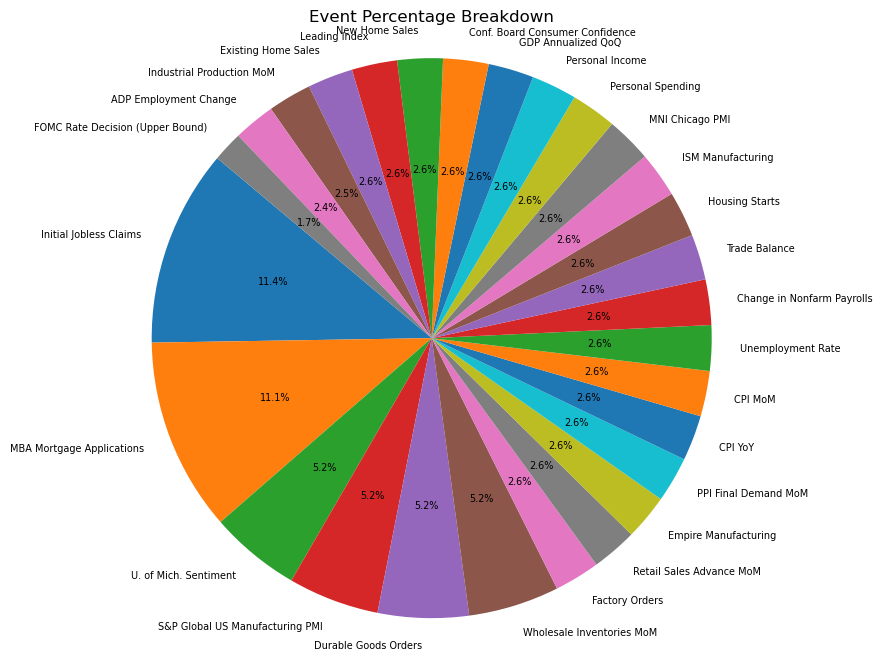

event name 
Initial Jobless Claims              104
MBA Mortgage Applications           102
U. of Mich. Sentiment                48
S&P Global US Manufacturing PMI      48
Durable Goods Orders                 48
Wholesale Inventories MoM            48
Factory Orders                       24
Retail Sales Advance MoM             24
Empire Manufacturing                 24
PPI Final Demand MoM                 24
CPI YoY                              24
CPI MoM                              24
Unemployment Rate                    24
Change in Nonfarm Payrolls           24
Trade Balance                        24
Housing Starts                       24
ISM Manufacturing                    24
MNI Chicago PMI                      24
Personal Spending                    24
Personal Income                      24
GDP Annualized QoQ                   24
Conf. Board Consumer Confidence      24
New Home Sales                       24
Leading Index                        24
Existing Home Sales         

In [9]:
# Group by the number of different unique event names and count the occurrences
grouped_counts = economics['event name '].value_counts()

# Create a pie chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) #Size of the chart 
plt.pie(grouped_counts, labels=grouped_counts.index,autopct='%1.1f%%', startangle=140,textprops={'fontsize': 7}) #Input data into pie chart (parameters)
plt.title('Event Percentage Breakdown') #Chart Title 
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

print(grouped_counts) # Data in table format 

The larger economics dataframe needs to be cleaned to filter specifically for the CPI MoM event name. Using pandas, I am able to filter for these kinds of rows and save this new filtered result to a new variable called 'filtered_economics'. Since only four of the columns are needed to do analze price history, I created another variable that includes the specific columns required ('date','event name','survey median','actual'). 

In [10]:
filtered_Economics = economics[(economics['event name '] == 'CPI MoM')] 
# Filtering the larger economics dataset to filter for only 'event name'=='CPI MoM'

eco = filtered_Economics[['date ','event name ','survey median','actual ']] 
# Create a new dataframe with the filtered economics data (CPI and relevant columns) 

eco.head(5) # Displays preview of the new dataframe filtered for event name of 'CPI MoM'

,date,event name,survey median,actual
30,5/11/2022 8:30,CPI MoM,0.200,0.3
68,6/10/2022 8:30,CPI MoM,0.700,1.0
106,7/13/2022 8:30,CPI MoM,1.095,1.3
142,8/10/2022 8:30,CPI MoM,0.200,0.0
181,9/13/2022 8:30,CPI MoM,-0.100,0.1


The next section introduces the second dataset. The price_history dataframe contains two years of historical price data for the different sector indices that make up the S&P 500 Index. Depending on each member of the S&P's business focus, they are included in one of the following sector indices below: 

| Ticker | Description |
|--------|-------------|
| S5INFT | S&P 500 Information Technology Sector GICS Level 1 Index |
| S5FINL | S&P 500 Financials Sector GICS Level 1 Index |
| S5HLTH | S&P 500 Health Care Sector GICS Level 1 Index |
| S5COND | S&P 500 Consumer Discretionary Sector GICS Level 1 Index |
| S5TELS | S&P 500 Communication Services Sector GICS Level 1 Index |
| S5INDU | S&P 500 Industrials Sector GICS Level 1 Index |
| S5CONS | S&P 500 Consumer Staples Sector GICS Level 1 Index |
| S5ENRS | S&P 500 Energy Sector GICS Level 1 Index |
| S5UTIL | S&P 500 Utilities Sector GICS Level 1 Index |
| S5MATR | S&P 500 Materials Sector GICS Level 1 Index |
| S5RLST | S&P 500 Real Estate Sector GICS Level 1 Index |
el 1 Indexel 1 Index

In [98]:
prices = price_history.head(10) # Return a preview of the price_history dataframe 
price_history.rename(columns={'Unnamed: 0': 'Date'}, inplace=True) #Rename the unamed column to read as "Date" 
price_history.columns

Index(['S5INFT Index', 'S5FINL Index', 'S5HLTH Index', 'S5COND Index',
       'S5TELS Index', 'S5INDU Index', 'S5CONS Index', 'S5ENRS Index',
       'S5MATR Index', 'S5UTIL Index', 'S5RLST Index'],
      dtype='object')

In [12]:
price_history #Loaded the price_history dataframe


,Date,S5INFT Index,S5FINL Index,S5HLTH Index,S5COND Index,S5TELS Index,S5INDU Index,S5CONS Index,S5ENRS Index,S5MATR Index,S5UTIL Index,S5RLST Index
0,4/18/2022,2583.12,617.14,1597.73,1411.0120,223.46,842.21,817.81,616.80,559.69,384.59,304.24
1,4/19/2022,2630.64,625.28,1612.58,1452.0860,228.08,857.43,829.84,610.86,564.89,386.94,310.69
2,4/20/2022,2627.16,629.57,1634.24,1432.4030,218.80,862.09,841.99,613.39,568.78,390.02,316.44
3,4/21/2022,2581.78,619.90,1616.16,1414.7490,213.52,853.46,841.10,594.35,559.25,383.81,314.44
4,4/22/2022,2509.65,601.30,1557.49,1381.1580,206.48,832.24,827.69,579.90,538.40,377.35,308.86
...,...,...,...,...,...,...,...,...,...,...,...,...
497,4/10/2024,3748.77,680.14,1651.90,1457.6130,290.89,1050.60,792.37,747.94,577.00,329.18,235.87
498,4/11/2024,3837.39,676.18,1643.79,1471.2520,294.21,1051.71,790.16,746.47,576.40,328.50,235.93
499,4/12/2024,3774.45,666.45,1618.87,1447.5810,289.83,1040.47,782.99,734.96,566.21,326.08,233.47
500,4/15/2024,3699.34,663.05,1615.76,1424.1507,285.12,1032.92,779.45,728.34,563.42,323.11,229.33


In [101]:
price_history.isnull().sum() # There is only 1 null value in the entire dataset for each of the indices. This is the last row. 

S5INFT Index    1
S5FINL Index    1
S5HLTH Index    1
S5COND Index    1
S5TELS Index    1
S5INDU Index    1
S5CONS Index    1
S5ENRS Index    1
S5MATR Index    1
S5UTIL Index    1
S5RLST Index    1
dtype: int64

With the goal being to analyze the price impact of CPI MoM releases on the price of the sector indices, we need to determine the correct dates to calculate the returns. I isolated the 'date' column for CPI and added this to a new list called 'cleaned_CPI_dates'. The CPI data was reported the date format 'MM/DD/YYYY HH:MM'. Comparing this to the date column in the price_history dataframe - it is clear that the time component needed to be removed. Below, I used the .split() to seperate this string and only take the first part before the space. Effectively, this made the MM/DD/YYYY HH:MM format into just MM/DD/YYYY which would match the format in the price_history dataframe. 


In [13]:
#Adding the dates of CPI release to new list called CPI_dates 
CPI_dates = eco['date '].tolist() #Creating the CPI Data list 
cleaned_CPI_dates = [] #Empty container for cleaned dates (removing time) 

for date in CPI_dates: #For loop to go through the list 
    new_date = date.split(' ')[0] #Split where there is a space (Between date & time) and only take the first part. 
    cleaned_CPI_dates.append(new_date) # Adding the cleaned dates to the new list
cleaned_CPI_dates

['5/11/2022',
 '6/10/2022',
 '7/13/2022',
 '8/10/2022',
 '9/13/2022',
 '10/13/2022',
 '11/10/2022',
 '12/13/2022',
 '1/12/2023',
 '2/14/2023',
 '3/14/2023',
 '4/12/2023',
 '5/10/2023',
 '6/13/2023',
 '7/12/2023',
 '8/10/2023',
 '9/13/2023',
 '10/12/2023',
 '11/14/2023',
 '12/12/2023',
 '1/11/2024',
 '2/13/2024',
 '3/12/2024',
 '4/10/2024']

I need to create two new lists of dates relative to each CPI release. One will be used to get the closing price of each of the indices a day before the CPI data was released. The second list is needed to get the dates of 2 weeks after this was released. The first list will be use to obtain index prices on the day before the CPI release. The second will be used to get each index price 2 weeks after the CPI print occured. With both of these datapoints, we can determine later on the different two week returns right after the CPI was reported. 

The datetime package in Python is a module that provides classes for working with dates and times. It offers a range of functions for date and time operations, including creating, formatting, and manipulating dates and times, as well as performing arithmetic operations on them. Within this module, the strptime function in Python is utilized to parse a string that represents a date and time and convert it into a datetime object based on a specified format. This function is part of the datetime module, and its complete name is datetime.strptime.

The timedelta class from the datetime module in Python represents the difference between two dates or times. It is used to perform arithmetic operations on datetime objects, such as adding or subtracting a duration from a specific date and time. This allows me to do the relative -1 day from the CPI release date as well as +14 days after the  release to correctly observe price reaction. 

After using the for loop to retreive the specific dates for the returns calculation, the two lists of dates were combined into a new list called combined_dates. When analyzing the price_history dataframe, these are all the dates which are needed to calculate returns 14 days post each CPI MoM release.  


In [14]:
from datetime import datetime, timedelta

Previous_date_CPI = []
Two_weeks_post_CPI = [] 

for date_str in cleaned_CPI_dates:
    #Convert the string into datetime object 
    date_obj = datetime.strptime(date_str,'%m/%d/%Y')
    #Make relative offsets for the day before and 14 days after
    prev_day = date_obj - timedelta(days=1)
    after_14_days = date_obj + timedelta(days=14)
    #Convert back to a string and append to the list
    Previous_date_CPI.append(prev_day.strftime('%m/%d/%Y'))
    Two_weeks_post_CPI.append(after_14_days.strftime('%m/%d/%Y'))


Previous_date_CPI = pd.to_datetime(Previous_date_CPI, format='%m/%d/%Y') # List of dates, each -1d before each CPI print 
Two_weeks_post_CPI = pd.to_datetime(Two_weeks_post_CPI, format='%m/%d/%Y') # List of dates, each +14d after each CPI print
combined_dates = sorted(list(Previous_date_CPI) + list(Two_weeks_post_CPI)) # Sorted list of both lists above

combined_dates # In datetime format 

[Timestamp('2022-05-10 00:00:00'),
 Timestamp('2022-05-25 00:00:00'),
 Timestamp('2022-06-09 00:00:00'),
 Timestamp('2022-06-24 00:00:00'),
 Timestamp('2022-07-12 00:00:00'),
 Timestamp('2022-07-27 00:00:00'),
 Timestamp('2022-08-09 00:00:00'),
 Timestamp('2022-08-24 00:00:00'),
 Timestamp('2022-09-12 00:00:00'),
 Timestamp('2022-09-27 00:00:00'),
 Timestamp('2022-10-12 00:00:00'),
 Timestamp('2022-10-27 00:00:00'),
 Timestamp('2022-11-09 00:00:00'),
 Timestamp('2022-11-24 00:00:00'),
 Timestamp('2022-12-12 00:00:00'),
 Timestamp('2022-12-27 00:00:00'),
 Timestamp('2023-01-11 00:00:00'),
 Timestamp('2023-01-26 00:00:00'),
 Timestamp('2023-02-13 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-13 00:00:00'),
 Timestamp('2023-03-28 00:00:00'),
 Timestamp('2023-04-11 00:00:00'),
 Timestamp('2023-04-26 00:00:00'),
 Timestamp('2023-05-09 00:00:00'),
 Timestamp('2023-05-24 00:00:00'),
 Timestamp('2023-06-12 00:00:00'),
 Timestamp('2023-06-27 00:00:00'),
 Timestamp('2023-07-

With these two lists of dates, we now have the correct dates to measure price reaction after the CPI release from the dataframe of index prices in price_history. I converted the 'Date' column in the price_history dataframe to the same format as the CPI release date data in case I use this again and formats do not align. 

Next, I used the .isin() method to determine the index prices on the dates that were in the combined_dates list. The .isin() method in Python is used to filter data in pandas DataFrames or Series by checking if elements are present in a specified list ('combined_dates' in this case), set, or other iterable. The instances where this occured where kept in a new dataframe called 'filtered_price_history'. 



In [99]:
# Check if 'Date' column exists
if 'Date' in price_history.columns:
    # Convert the 'Date' column to datetime format
    price_history['Date'] = pd.to_datetime(price_history['Date'], format='%m/%d/%Y') #Convert again to datetime 
    
    # Filter the DataFrame based on combined_dates
    filtered_price_history = price_history[price_history['Date'].isin(combined_dates)]
    
    # Set the 'Date' column as the index
    filtered_price_history.set_index('Date', inplace=True)
    
filtered_price_history

,S5INFT Index,S5FINL Index,S5HLTH Index,S5COND Index,S5TELS Index,S5INDU Index,S5CONS Index,S5ENRS Index,S5MATR Index,S5UTIL Index,S5RLST Index
Date,,,,,,,,,,,
2022-05-10,2401.85,558.31,1477.69,1173.4000,196.89,782.85,793.97,583.66,510.79,359.02,261.32
2022-05-25,2331.05,567.34,1526.67,1107.3710,191.66,773.54,760.84,650.62,525.95,374.38,272.78
2022-06-09,2379.00,559.10,1483.32,1176.7020,197.80,788.81,747.32,682.35,527.19,362.99,263.42
2022-06-24,2332.79,538.72,1506.72,1153.0400,196.20,751.42,758.61,547.02,481.35,350.86,261.97
2022-07-12,2261.05,525.77,1500.83,1109.0790,190.08,736.16,753.79,525.18,457.16,355.25,256.53
2022-07-27,2449.09,548.46,1538.91,1208.9060,192.89,776.32,766.95,570.32,476.87,359.85,266.79
2022-08-09,2523.61,561.88,1529.96,1280.3190,194.11,809.19,773.16,570.57,485.17,381.54,277.71
2022-08-24,2512.16,568.16,1506.51,1288.6911,190.96,822.33,788.21,631.38,495.49,386.89,271.53
2022-09-12,2437.59,574.07,1526.98,1307.3270,188.98,807.86,771.41,623.30,493.69,394.81,271.13


Since the rows are now filtered to return prices on the list of dates from 'combined_dates', we can take the percent change between the different dates and get the value for the price change between the two sequential dates within the new dataframe 'price_change'. In the next step, we can filter to only return the price change value if the day of the month is greater than 20th day in the month. CPI is always reported in the middle of the second week of a month, so it is safe to assume that any values in the dataframe below that are greater than 20 are absolutely the date that is 14 days after the CPI report. 

In [19]:
print(filtered_price_history.columns)


Index(['S5INFT Index', 'S5FINL Index', 'S5HLTH Index', 'S5COND Index',
       'S5TELS Index', 'S5INDU Index', 'S5CONS Index', 'S5ENRS Index',
       'S5MATR Index', 'S5UTIL Index', 'S5RLST Index'],
      dtype='object')


In [29]:
# Calculate the price change for each index between the dates that are 2 weeks apart
price_change = filtered_price_history.pct_change(periods=1) * 100

# Reset the index to include the 'Date' column again
price_change.reset_index(inplace=True)

# Display the calculated price changes
price_change
 

,Date,S5INFT Index,S5FINL Index,S5HLTH Index,S5COND Index,S5TELS Index,S5INDU Index,S5CONS Index,S5ENRS Index,S5MATR Index,S5UTIL Index,S5RLST Index
0,2022-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-25,-2.947728,1.617381,3.314633,-5.627152,-2.656306,-1.189244,-4.172702,11.472433,2.967952,4.278313,4.385428
2,2022-06-09,2.057013,-1.452392,-2.839513,6.260865,3.203590,1.974041,-1.776983,4.876887,0.235764,-3.042363,-3.431337
3,2022-06-24,-1.942413,-3.645144,1.577542,-2.010874,-0.808898,-4.740051,1.510732,-19.832930,-8.695157,-3.341690,-0.550452
4,2022-07-12,-3.075288,-2.403846,-0.390915,-3.812617,-3.119266,-2.030822,-0.635373,-3.992541,-5.025449,1.251211,-2.076574
5,2022-07-27,8.316490,4.315575,2.537263,9.000892,1.478325,5.455336,1.745844,8.595148,4.311401,1.294863,3.999532
6,2022-08-09,3.042763,2.446851,-0.581580,5.907242,0.632485,4.234079,0.809701,0.043835,1.740516,6.027511,4.093107
7,2022-08-24,-0.453715,1.117676,-1.532720,0.653907,-1.622791,1.623846,1.946557,10.657763,2.127089,1.402212,-2.225343
8,2022-09-12,-2.968362,1.040200,1.358770,1.446111,-1.036866,-1.759634,-2.131412,-1.279736,-0.363277,2.047093,-0.147313
9,2022-09-27,-11.346863,-11.735503,-7.419875,-11.963877,-13.371785,-12.451415,-7.726112,-14.200225,-13.956126,-11.413085,-16.608269


In [23]:
price_change.columns

Index(['Date', 'S5INFT Index', 'S5FINL Index', 'S5HLTH Index', 'S5COND Index',
       'S5TELS Index', 'S5INDU Index', 'S5CONS Index', 'S5ENRS Index',
       'S5MATR Index', 'S5UTIL Index', 'S5RLST Index'],
      dtype='object')

Below is the filtered dataset to only return the calculated price return from a day before CPI release and 14 days after. Since CPI is reported in the middle of the second week of each month - I can isolate the proper return interval by filtering only for the one that are from greater than the 20th day in any of the given months. Below, the two_week variable is this updated dataframe. 

In [79]:
two_week = price_change[price_change['Date'].dt.day > 20] 
price_change = two_week
price_change

,Date,S5INFT Index,S5FINL Index,S5HLTH Index,S5COND Index,S5TELS Index,S5INDU Index,S5CONS Index,S5ENRS Index,S5MATR Index,S5UTIL Index,S5RLST Index
1,2022-05-25,-2.947728,1.617381,3.314633,-5.627152,-2.656306,-1.189244,-4.172702,11.472433,2.967952,4.278313,4.385428
3,2022-06-24,-1.942413,-3.645144,1.577542,-2.010874,-0.808898,-4.740051,1.510732,-19.832930,-8.695157,-3.341690,-0.550452
5,2022-07-27,8.316490,4.315575,2.537263,9.000892,1.478325,5.455336,1.745844,8.595148,4.311401,1.294863,3.999532
7,2022-08-24,-0.453715,1.117676,-1.532720,0.653907,-1.622791,1.623846,1.946557,10.657763,2.127089,1.402212,-2.225343
9,2022-09-27,-11.346863,-11.735503,-7.419875,-11.963877,-13.371785,-12.451415,-7.726112,-14.200225,-13.956126,-11.413085,-16.608269
11,2022-10-27,6.411637,10.149450,7.106017,3.578431,-0.683442,9.006999,5.757253,10.561254,7.933969,6.565511,5.728092
14,2022-12-27,-7.592070,-2.389785,-2.314641,-8.511226,-4.674932,-1.695314,-0.976999,4.780506,-3.277249,-0.770808,-3.389059
16,2023-01-26,5.433692,1.287265,-1.238072,4.671249,6.873379,-1.211784,-2.520955,5.639881,0.814563,-4.419226,1.576203
18,2023-02-28,-4.463630,-3.238860,-4.878864,-3.200525,-4.569952,-2.288290,-2.580219,-7.253856,-0.914235,-4.896602,-5.747081
20,2023-03-28,5.830672,-0.519377,1.724611,2.632238,8.011453,0.163780,3.021432,0.481775,0.860277,1.514142,-3.463429


To visualize this for a single index - I have added a Scatterplot that shows the performance of the S5INFT Index (Information Technology) to the workbook below. In this example, we see a single index and its two week returns post CPI release. This sector performed very well considering the 2 week returns post inflation print were predominantly all in positive territory. 


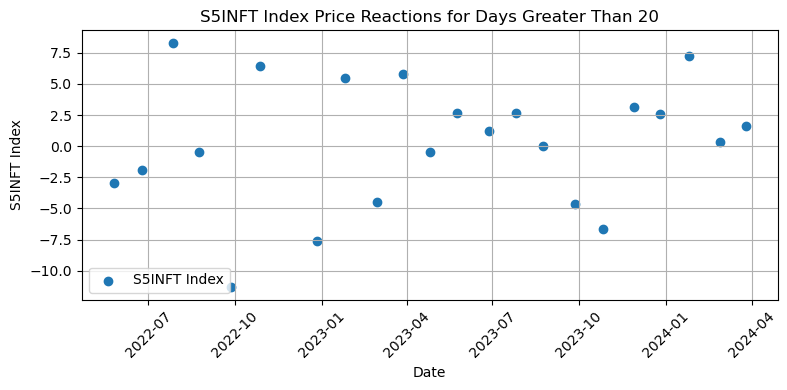

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for illustration (use your actual DataFrame instead)
data = price_change

# Example scatter plot for 'S5INFT Index' against 'Date'
plt.figure(figsize=(8, 4))
plt.scatter(price_change['Date'],price_change['S5INFT Index'], label='S5INFT Index')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('S5INFT Index')
plt.title('S5INFT Index Price Reactions for Days Greater Than 20')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Using a for loop - we can use the same code and plot a similar data structure on another scatterplot with all the other sectors. Using a for loop I can iterate through the list of indices and plot this data for each of them. This is the first time I am using enumerate.  The enumerate function is a built-in function that adds a counter to an iterable (such as a list, tuple, or string) and returns it as an enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples.

C:\Users\dmullane6\AppData\Local\Temp\ipykernel_29892\2390545944.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(indices))


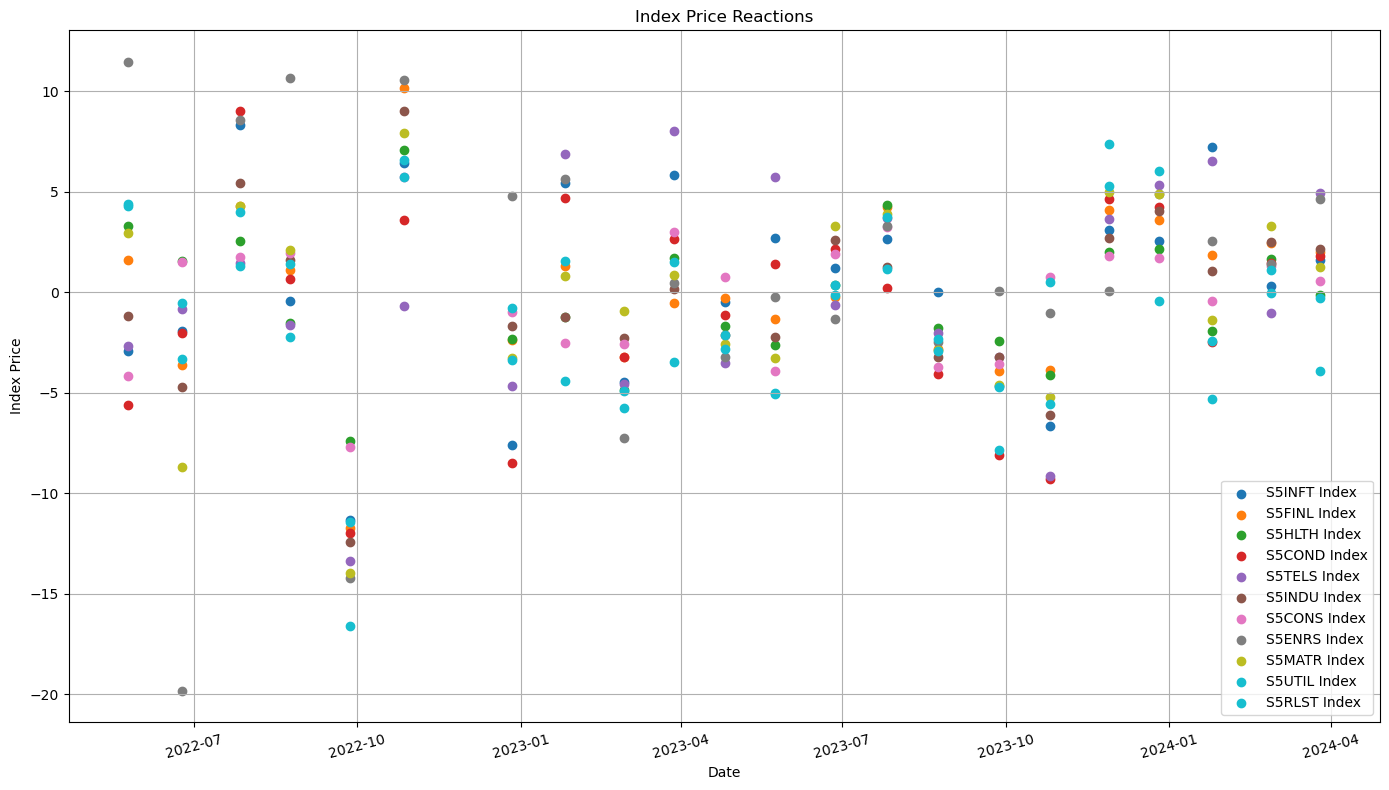

In [103]:
# List of indices to plot
indices = [
    'S5INFT Index', 'S5FINL Index', 'S5HLTH Index', 'S5COND Index', 'S5TELS Index',
    'S5INDU Index', 'S5CONS Index', 'S5ENRS Index', 'S5MATR Index', 'S5UTIL Index', 'S5RLST Index'] 

# Colors for the plot
colors = plt.cm.get_cmap('tab10', len(indices))

# Create the scatter plot
plt.figure(figsize=(14, 8))

for i, index in enumerate(indices): # Loop through each index and plot it on the scatter plot
    plt.scatter(price_change['Date'], price_change[index], label=index, color=colors(i))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Index Price')
plt.title('Index Price Reactions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=15)
plt.tight_layout()

# Show the plot
plt.show()

ECONOMIC SURPRISE SCATTERPLOT:
The scatter plot generated by this code visually compares the survey median (consensus forecast) against the actual CPI MoM releases over time. This visualization helps in identifying discrepancies between expected (survey median) and actual values, which can be crucial for economic analysis and decision-making.

Each point represents the CPI MoM value for a given date, with blue points for survey median values and red points for actual values. The plot allows for easy visual comparison of the expected versus actual CPI MoM releases.








C:\Users\dmullane6\AppData\Local\Temp\ipykernel_29892\4264755493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco['date '] = pd.to_datetime(eco['date ']) #Convert to datatime


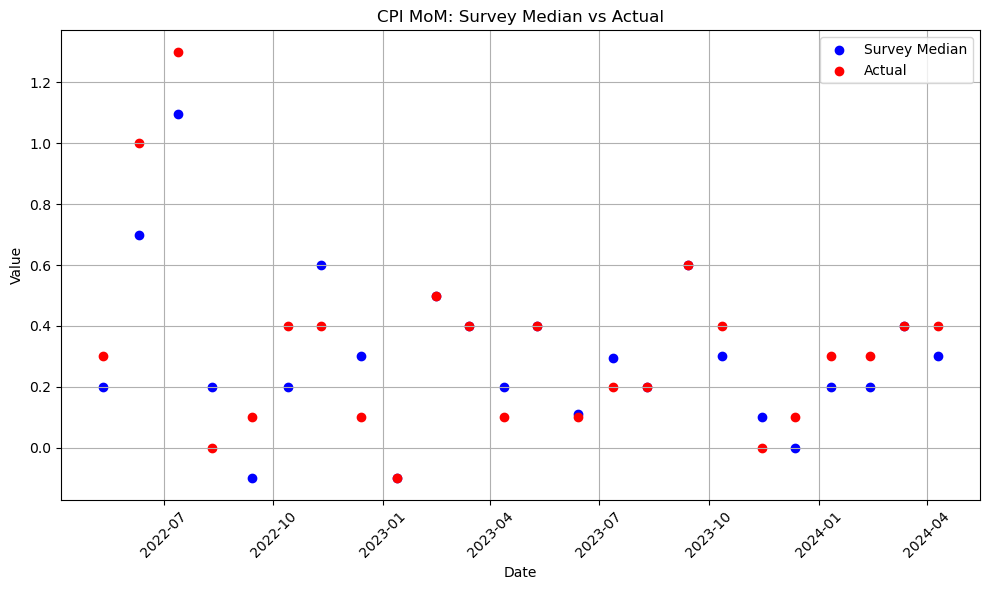

In [104]:
# Converting the date column to datetime
eco['date '] = pd.to_datetime(eco['date ']) #Convert to datatime 

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(eco['date '], eco['survey median'], color='blue', label='Survey Median')
plt.scatter(eco['date '], eco['actual '], color='red', label='Actual')

plt.title('CPI MoM: Survey Median vs Actual')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

DISTRIBUTION OF ECONOMIC DATA: The provided code utilizes the Matplotlib and SciPy libraries to analyze and visualize the 'eco_surprise' data, which represents the difference between actual CPI values and survey median CPI values. Initially, the code calculates the 'eco_surprise' by subtracting the survey median from the actual values, and then it displays the updated DataFrame. The mean and standard deviation of the 'eco_surprise' data are computed to understand its distribution. A range of x-values is generated to span four standard deviations around the mean, and the normal distribution is calculated using these values. The code then creates a histogram of the 'eco_surprise' data, normalizes it to form a probability density, and overlays the normal distribution curve. Titles, axis labels, and a legend are added for clarity, and the plot is displayed with gridlines for better readability. This visualization helps to understand the distribution and variability of the 'eco_surprise' data, highlighting how actual CPI values compare to consensus forecasts.

C:\Users\dmullane6\AppData\Local\Temp\ipykernel_29892\119962258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eco['eco_surprise'] = eco['actual '] - eco['survey median']


                  date   eco_surprise
30  2022-05-11 08:30:00         0.100
68  2022-06-10 08:30:00         0.300
106 2022-07-13 08:30:00         0.205
142 2022-08-10 08:30:00        -0.200
181 2022-09-13 08:30:00         0.200
221 2022-10-13 08:30:00         0.200
259 2022-11-10 08:30:00        -0.200
298 2022-12-13 08:30:00        -0.200
335 2023-01-12 08:30:00         0.000
374 2023-02-14 08:30:00         0.000
410 2023-03-14 08:30:00         0.000
449 2023-04-12 08:30:00        -0.100
487 2023-05-10 08:30:00         0.000
525 2023-06-13 08:30:00        -0.010
564 2023-07-12 08:30:00        -0.095
603 2023-08-10 08:30:00         0.000
641 2023-09-13 08:30:00         0.000
680 2023-10-12 08:30:00         0.100
719 2023-11-14 08:30:00        -0.100
756 2023-12-12 08:30:00         0.100
793 2024-01-11 08:30:00         0.100
832 2024-02-13 08:30:00         0.100
869 2024-03-12 08:30:00         0.000
907 2024-04-10 08:30:00         0.100


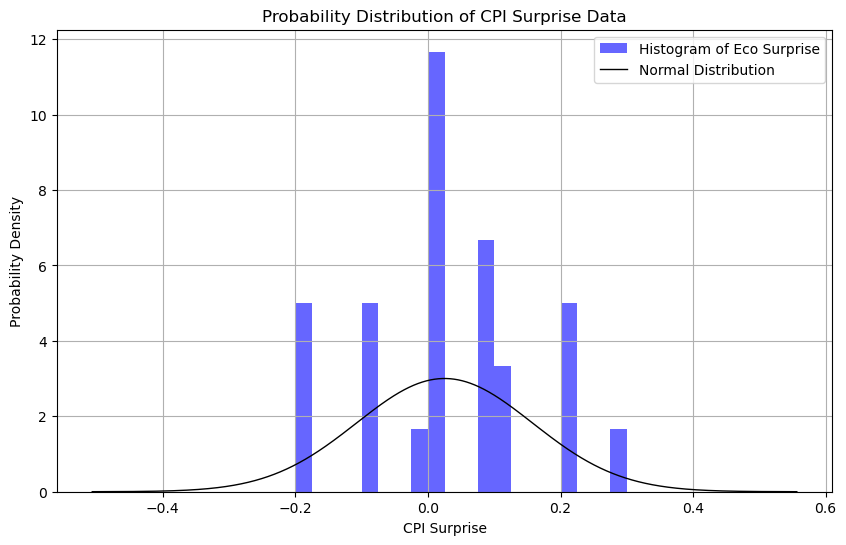

In [105]:
import matplotlib.pyplot as plt
import scipy.stats as stats


# Creating the 'eco_surprise' column
eco['eco_surprise'] = eco['actual '] - eco['survey median']

# Display the updated dataframe
print(eco[['date ','eco_surprise']])
# Selecting only the 'date' and 'eco_surprise' columns
eco_surprise_output = eco[['date ', 'eco_surprise']]

# Calculate mean and standard deviation of the 'eco_surprise' data
mean_surprise = eco['eco_surprise'].mean()
std_surprise = eco['eco_surprise'].std()

# Generate a range of values for the x-axis
x = np.linspace(mean_surprise - 4*std_surprise, mean_surprise + 4*std_surprise, 5000)

# Calculate the normal distribution values
pdf = stats.norm.pdf(x, mean_surprise, std_surprise)

# Plot the histogram of the 'eco_surprise' data
plt.figure(figsize=(10, 6))
plt.hist(eco['eco_surprise'], bins=20, density=True, alpha=0.6, color='b', label='Histogram of Eco Surprise')

# Plot the probability distribution
plt.plot(x, pdf, 'k', linewidth=1, label='Normal Distribution')

# Adding titles and labels
plt.title('Probability Distribution of CPI Surprise Data')
plt.xlabel('CPI Surprise')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In the code below, we can see that there were 10 positive surprises, meaning that CPI MoM was higher than the expected consensus value. There were 7 nagative surprises where inflation was less than the anticipated consensus value. This is determined by the number of rows when filtering for both types of situations. 

In [106]:
eco_new = eco[['date ','eco_surprise']]
positive_surprise = eco_new[eco_new['eco_surprise']>0]
negative_surprise = eco_new[eco_new['eco_surprise']<0]

print(positive_surprise.shape)
print(negative_surprise.shape)


(10, 2)
(7, 2)


Below, we see code to summarize the observations of the different 2 week returns immediately after a CPI release. We can see that the most volatile sector in regards to a CPI MoM report appears to be the Energy sector in S5ENRS Index, while the least volatilte would be the Healthcare Sector in S5ENRS Index. When considering the rest of the year, it is also true that over the past 2 years  the energy sector has been the most volatile overall with the greatest standard deviation. The standard deviation for the rest of the year for trailing -2w returns of a rolling basis for the past 2 years. 

A boxplot, also known as a box-and-whisker plot is used as a tool to describe the data. A boxplot is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can also identify outliers in the dataset. Boxplots are particularly useful for comparing distributions between several groups or datasets. This is used to display the data for the 2 week returns right after CPI release as well as for everydays trailing -2w return. 

In [107]:
# Initialize a dictionary to hold the statistics for each index
stats = {}

# Loop through each column (excluding the 'Date' column)
for ticker in price_change.columns[1:]:
    # Calculate statistics
    max_value = price_change[ticker].max()
    min_value = price_change[ticker].min()
    mean_value = price_change[ticker].mean()
    std_value = price_change[ticker].std()
    
    # Store the statistics in the dictionary
    stats[ticker] = {
        'max': max_value,
        'min': min_value,
        'mean': mean_value,
        'std': std_value
    }

# Convert the dictionary to a new DataFrame for better readability
stats_df_around_CPI = pd.DataFrame(stats).T

# Display the result
stats_df_around_CPI

,max,min,mean,std
S5INFT Index,8.316490,-11.346863,0.314225,5.088893
S5FINL Index,10.149450,-11.735503,0.121779,4.340377
S5HLTH Index,7.106017,-7.419875,-0.243260,3.310170
S5COND Index,9.000892,-11.963877,-0.905538,5.318542
S5TELS Index,8.011453,-13.371785,-0.080336,5.400312
S5INDU Index,9.006999,-12.451415,-0.357632,4.426168
S5CONS Index,5.757253,-7.726112,-0.168076,3.145317
S5ENRS Index,11.472433,-19.832930,0.893099,7.559819
S5MATR Index,7.933969,-13.956126,-0.276227,5.069316
S5UTIL Index,6.565511,-11.413085,-0.887123,4.167162


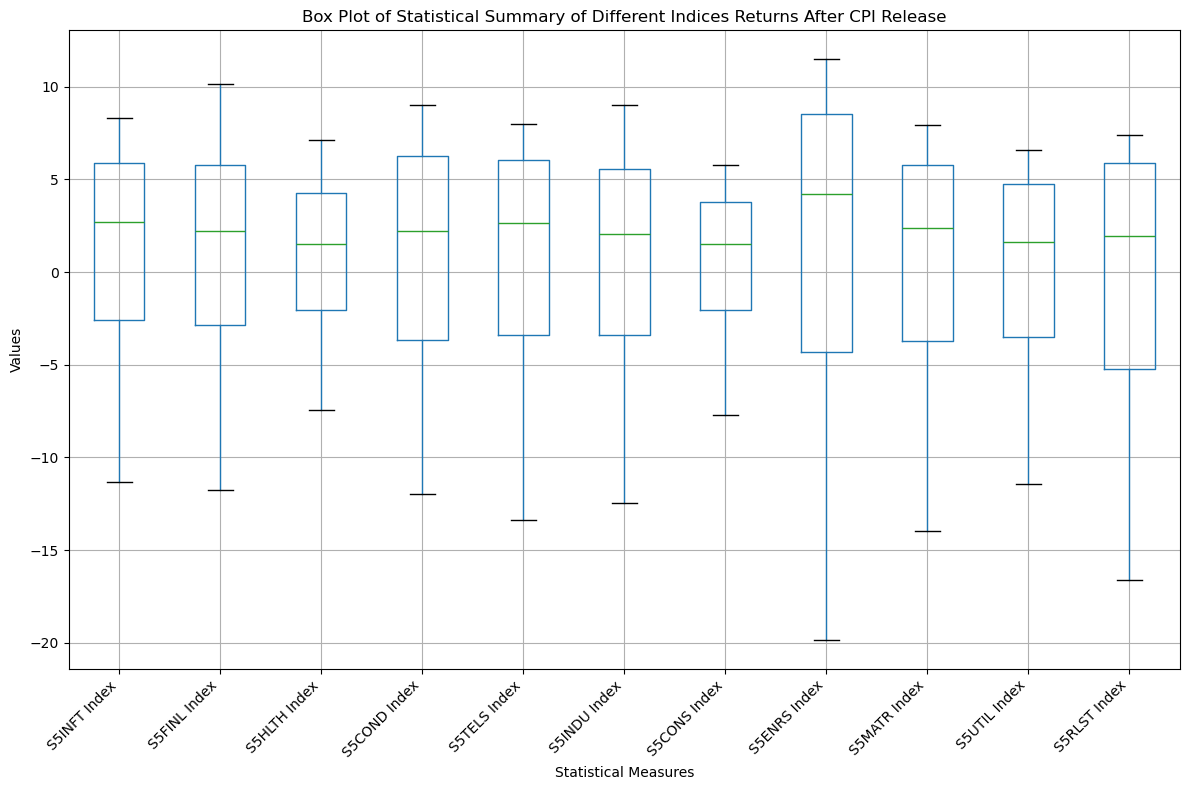

In [110]:

# Plotting the box plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create a new DataFrame to facilitate boxplot creation
boxplot_data = stats_df_around_CPI.T

# Plotting the box plot
boxplot_data.boxplot(ax=ax)
ax.set_title('Box Plot of Statistical Summary of Different Indices Returns After CPI Release')
ax.set_xlabel('Statistical Measures')
ax.set_ylabel('Values')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [95]:

# Calculate the trailing 2-week return for each index (10 business days,period = 10)
trailing_2w_return = price_history.pct_change(periods=10,fill_method=None)*100
# Initialize a dictionary to hold the statistics for each index
stats = {}

# Loop through each column (excluding the 'Date' column)
for ticker in trailing_2w_return.columns[1:]: #Start beyond the first column avoiding the date. 
    # Calculate statistics
    max_value = trailing_2w_return[ticker].max() 
    min_value = trailing_2w_return[ticker].min()
    mean_value = trailing_2w_return[ticker].mean()
    std_value = trailing_2w_return[ticker].std()
    
    # Store the statistics in the dictionary
    stats[ticker] = {
        'max': max_value,
        'min': min_value,
        'mean': mean_value,
        'std': std_value
    }

# Convert the dictionary to a DataFrame for better readability
stats_df_all = pd.DataFrame(stats).T

# Display the result
stats_df_all

,max,min,mean,std
S5FINL Index,10.361376,-14.074198,0.336880,4.038984
S5HLTH Index,8.581131,-9.243013,0.142360,2.781006
S5COND Index,15.021993,-15.715067,0.249166,5.079909
S5TELS Index,15.604086,-12.747381,0.757848,4.462202
S5INDU Index,11.692226,-12.180328,0.540437,3.628149
S5CONS Index,8.380627,-8.642932,-0.054638,2.672442
S5ENRS Index,16.559473,-22.862706,0.633285,5.489281
S5MATR Index,10.768893,-14.896047,0.198677,4.098880
S5UTIL Index,10.593400,-12.921857,-0.189981,4.023782
S5RLST Index,9.533613,-15.523918,-0.400376,4.591905


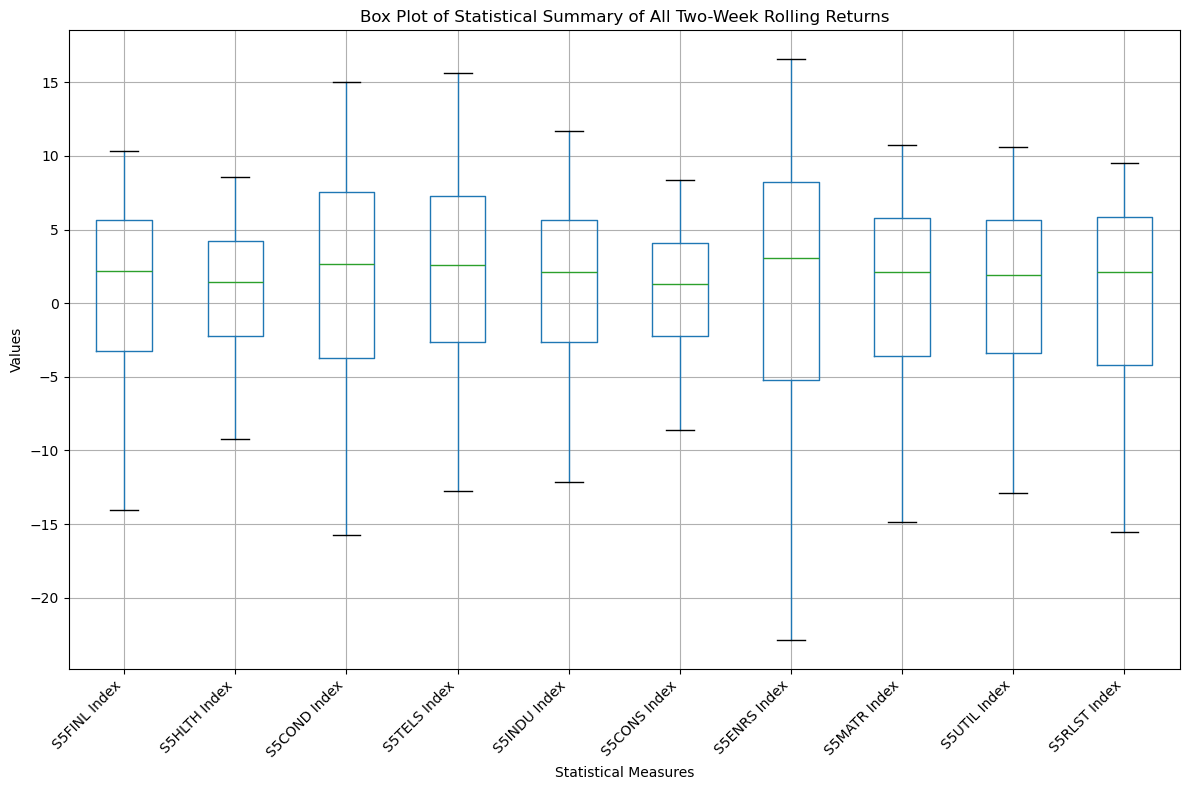

In [112]:

# Plotting the box plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create a new DataFrame to facilitate boxplot creation
boxplot_data = stats_df_all.T

# Plotting the box plot
boxplot_data.boxplot(ax=ax)
ax.set_title('Box Plot of Statistical Summary of All Two-Week Rolling Returns')
ax.set_xlabel('Statistical Measures')
ax.set_ylabel('Values')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


CONCLUSION:


Above you can see the results of 2 week returns during the period of time vs the rest of the year. The most volatile sector in regards to a CPI MoM report appears to be the Energy sector (S5ENRS Index), while the least volatilte would be the Healthcare Sector in S5ENRS Index. When considering the rest of the year, it is also true that over the past 2 years  the energy sector has been the most volatile overall with the greatest standard deviation. The standard deviation for the rest of the year for trailing -2w returns of a rolling basis for the past 2 years. 

It makes sense thatb Energy is the most volatile on this list in regards to inflation reports when we consider the following. Energy prices are impacted by inflation due to a combination of direct and indirect factors. Directly, inflation raises the cost of raw materials, labor, and capital investment needed for energy production. This includes higher prices for crude oil, natural gas, coal, and increased wages to keep pace with the cost of living, as well as elevated costs for building and maintaining energy infrastructure. Indirectly, inflation affects consumer spending and economic growth, potentially reducing demand for energy-intensive products and services as purchasing power declines. However, higher inflation can also lead to increased financing costs for energy companies, driving up energy prices as these companies pass on higher expenses to consumers. Additionally, inflation raises transportation costs due to higher fuel prices, impacting the entire energy supply chain. Global supply chain disruptions, often exacerbated by inflation, further contribute to increased energy prices. Energy-specific factors, such as oil prices sensitive to inflation and geopolitical tensions, also play a significant role. Moreover, currency devaluation due to inflation can lead to higher prices for imported energy resources, further driving up overall energy costs.






